In [98]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib._tri import Triangulation
import NN
import DataLoader as dl
importlib.reload(NN)
importlib.reload(dl)
from dvclive import Live

# Loading and Formatting Data

In [99]:
train_file = "Train.csv"
test_file = "Test.csv"
train_df = dl.load_data(train_file, True)
test_df = dl.load_data(test_file, True)
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


# Visualizing Data

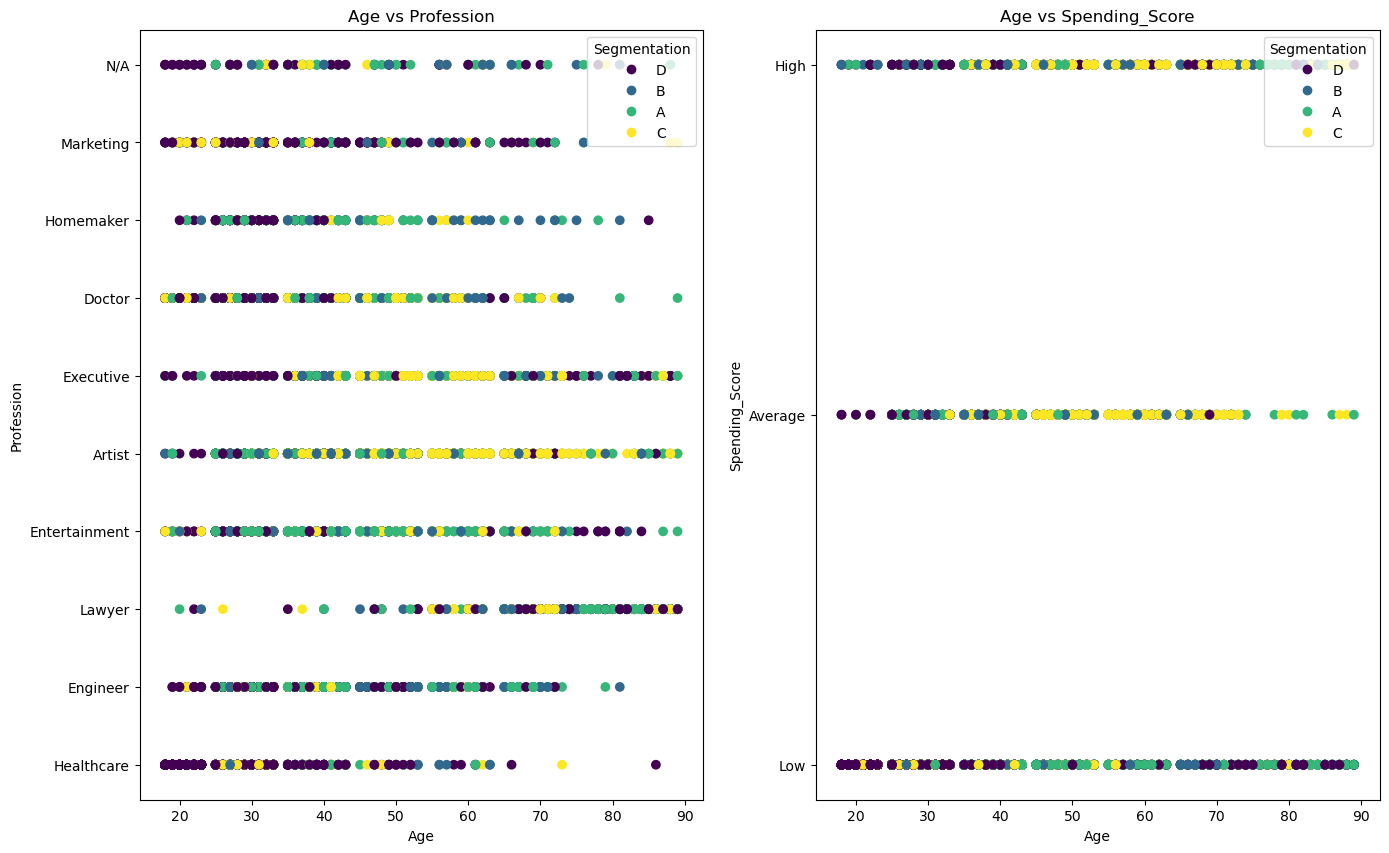

In [100]:
charts = [["Age", "Profession"], ["Age", "Spending_Score"]]
dl.scatter_plots(train_df, charts, "Segmentation")

# Data Preprocessing

In [41]:
features = ["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score", "Family_Size", "Var_1"]
label = "Segmentation"
categorical_features = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]
numerical_features = ["Age", "Work_Experience", "Family_Size"]

# Converting categorical data to numericals
for feature in categorical_features:
    dl.categorical_to_numerical(train_df, feature, True)
    dl.categorical_to_numerical(test_df, feature, True)

dl.categorical_to_numerical(train_df, label, True)
dl.categorical_to_numerical(train_df, label, True)

# Normalizing the features
for feature in numerical_features:
    dl.normalize(train_df, feature, True)
    dl.normalize(test_df, feature, True)

In [42]:
# Showing Result of Conversion and Feature Normalization
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,1,-1.284623,1,5,-0.412102,2,0.790964,3,3
1,462643,0,2,-0.327151,2,2,-0.712857,0,0.167284,3,0
2,466315,0,2,1.408268,2,2,-0.412102,2,-1.080077,5,1
3,461735,1,2,1.408268,2,7,-0.712857,1,-0.456397,5,1
4,462669,0,2,-0.207467,2,3,-0.712857,1,2.038325,5,0


In [27]:
layers = [
    NN.DenseLayer(2, 0, NN.dummy_activation, NN.dummy_activation, True, False),
    NN.DenseLayer(4, 2, NN.sigmoid, NN.sigmoid_prime),
    NN.DenseLayer(2, 4, NN.sigmoid, NN.sigmoid_prime, False, True)
]
learning_rate = 0.01
lamda = 0.2

In [28]:
# with Live(save_dvc_exp=True) as live:
    # live.log_param("Learning Rate", learning_rate)
losses = []
for i in range(2000):
    # live.log_param('Epoch', i)
    a2 = layers[1].forward_propagation(X)
    loss = layers[2].loss(a2, y, 2, lamda)
    losses.append(loss)
    # live.log_metric("Loss", loss)
    NN.backward_propagate(layers, X, y, learning_rate, lamda)
    # live.next_step()

ValueError: operands could not be broadcast together with shapes (2,2) (2,5) 